# Insurance - EDA & Hypothesis Testing

In [1]:
# Importing The Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew, stats
from math import sqrt
from numpy import mean , var
%matplotlib inline

In [2]:
data = pd.read_csv('insurance.csv') # Dataset can be download from kaggle 
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.isnull().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [9]:
# you can use this method also to know null values 
null = data.isnull() 
null.head()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [10]:
for i in null:
    if i == True:
        print('There are null values')
    else:
        print('There are no null values')

There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values


In [11]:
# 5 number sammary 
from numpy import percentile
newdata = data.loc[:,['age','bmi','children','charges']]
newdata.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [12]:
quartiles = percentile(newdata,[25,50,75])
data_min,data_max = newdata.min(),newdata.max()

print('Min:\n',data_min)
print('....'*10)
print('Q1: \n',quartiles)
print('median:\n',quartiles)
print('Q3:\n', quartiles)
print('....'*10)
print('Max:\n', data_max)

Min:
 age           18.0000
bmi           15.9600
children       0.0000
charges     1121.8739
dtype: float64
........................................
Q1: 
 [ 13.22      32.47     328.468475]
median:
 [ 13.22      32.47     328.468475]
Q3:
 [ 13.22      32.47     328.468475]
........................................
Max:
 age            64.00000
bmi            53.13000
children        5.00000
charges     63770.42801
dtype: float64


In [13]:
data.describe().T # you can get 5 number summary with .describe().

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [14]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [15]:
DistData =data.loc[:,['bmi','age','charges','children']]
DistData.head()

,bmi,age,charges,children
0,27.900,19,16884.92400,0
1,33.770,18,1725.55230,1
2,33.000,28,4449.46200,3
3,22.705,33,21984.47061,0
4,28.880,32,3866.85520,0


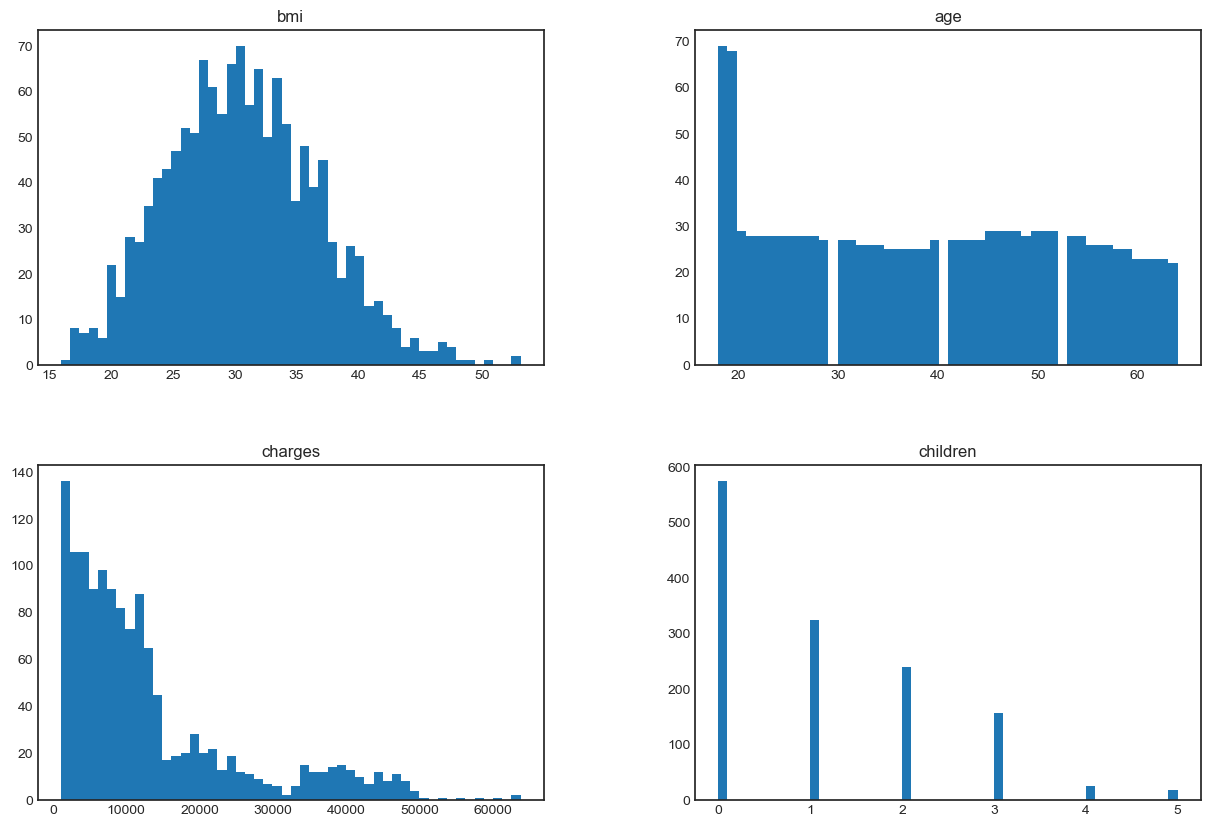

In [16]:
plt.style.use('seaborn-white')
DistData.hist(bins=50,figsize=(15,10),grid= False)
plt.show()

C:\Users\Shahzaib Laptops\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


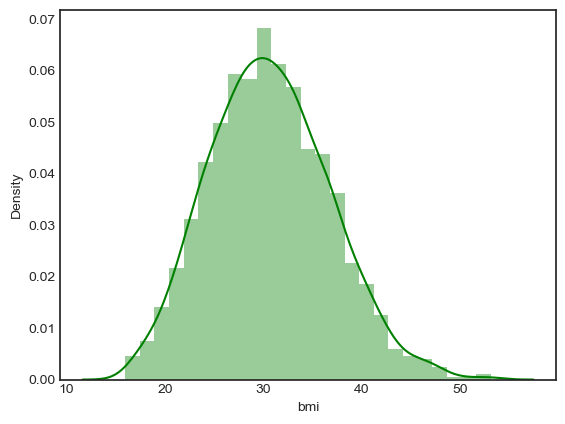

In [17]:
sns.distplot(DistData['bmi'],color='green')
plt.show()

C:\Users\Shahzaib Laptops\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


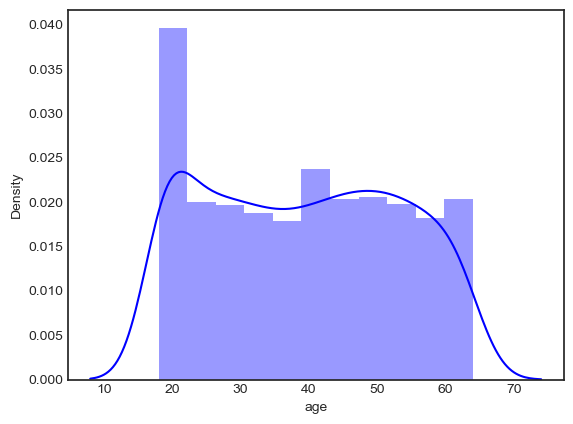

In [18]:
sns.distplot(DistData['age'],color='blue')
plt.show()

C:\Users\Shahzaib Laptops\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


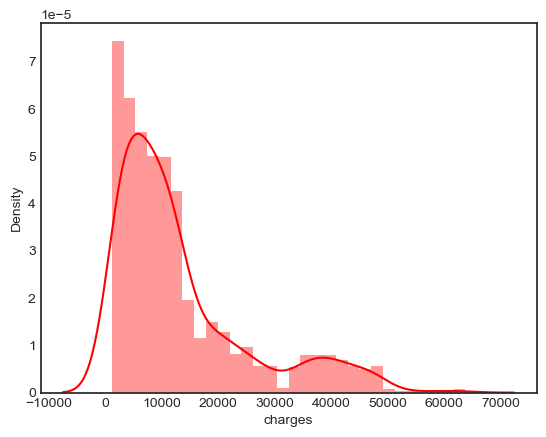

In [19]:
sns.distplot(DistData['charges'],color='red')
plt.show()

C:\Users\Shahzaib Laptops\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


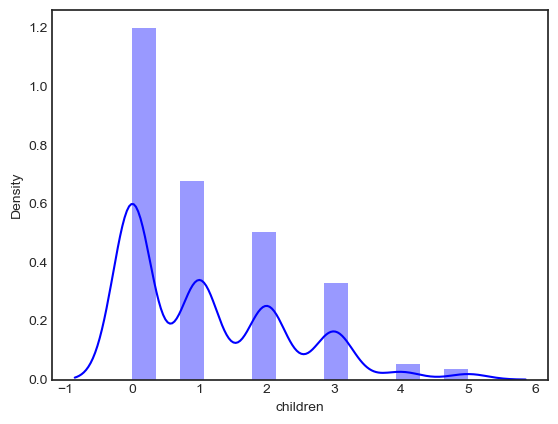

In [20]:
sns.distplot(DistData['children'],color='blue')
plt.show()

Text(0.5, 0, 'charges')

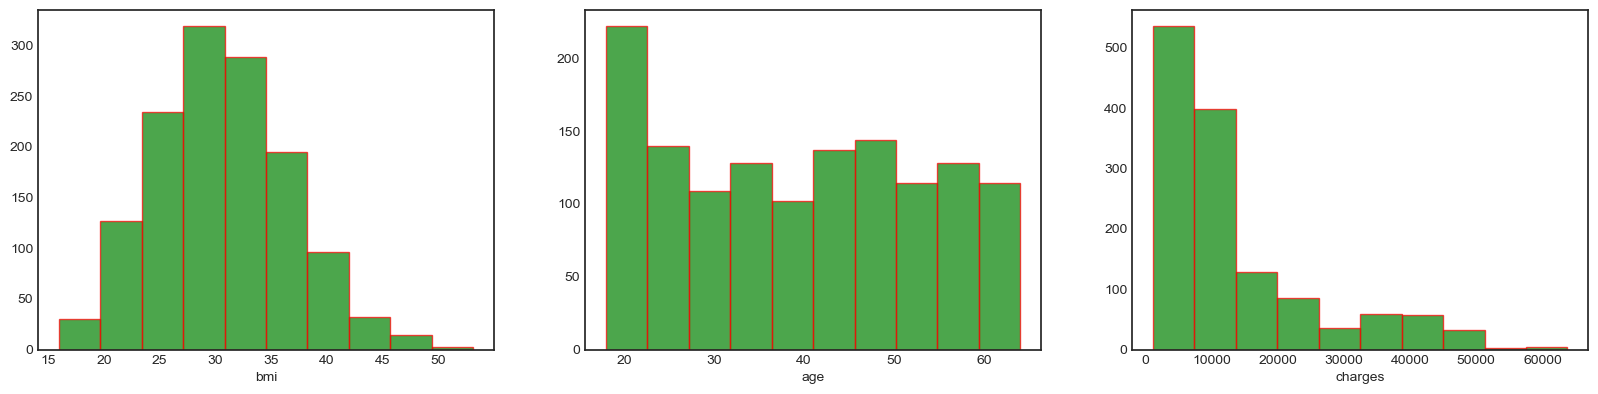

In [21]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.hist(data.bmi,color='green',edgecolor='red',alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(data.age,color='green',edgecolor='red',alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(data.charges,color='green',edgecolor='red',alpha = 0.7)
plt.xlabel('charges')

In [22]:
skewness = pd.DataFrame({'skewness':[stats.skew(data.bmi),stats.skew(data.age),stats.skew(data.charges)]},
                       index=['bmi','age','charges'])
skewness

C:\Users\Shahzaib Laptops\AppData\Local\Temp\ipykernel_10164\3173067832.py:1: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skewness = pd.DataFrame({'skewness':[stats.skew(data.bmi),stats.skew(data.age),stats.skew(data.charges)]},


,skewness
bmi,0.283729
age,0.055610
charges,1.514180


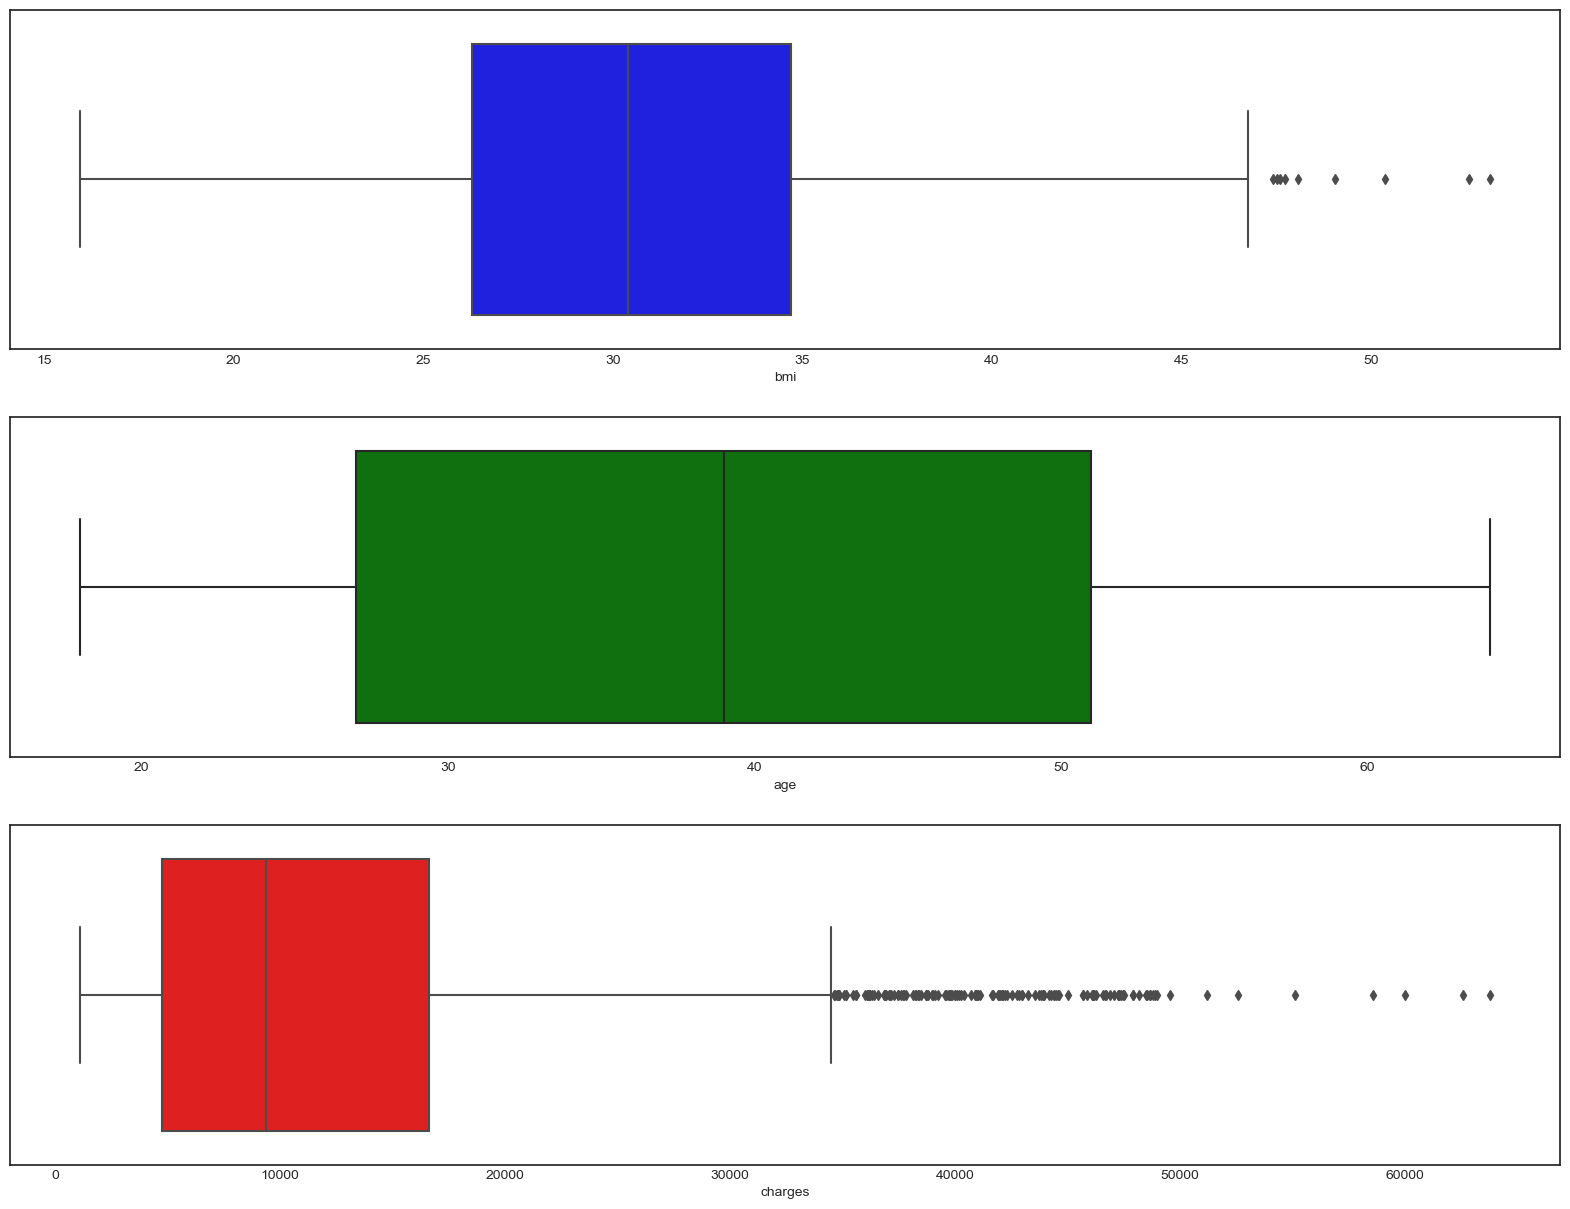

In [23]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.boxplot(x=data.bmi, color='blue')

plt.subplot(3,1,2)
sns.boxplot(x=data.age, color='green')

plt.subplot(3,1,3)
sns.boxplot(x=data.charges, color='red')

plt.show()

In [24]:
df = data

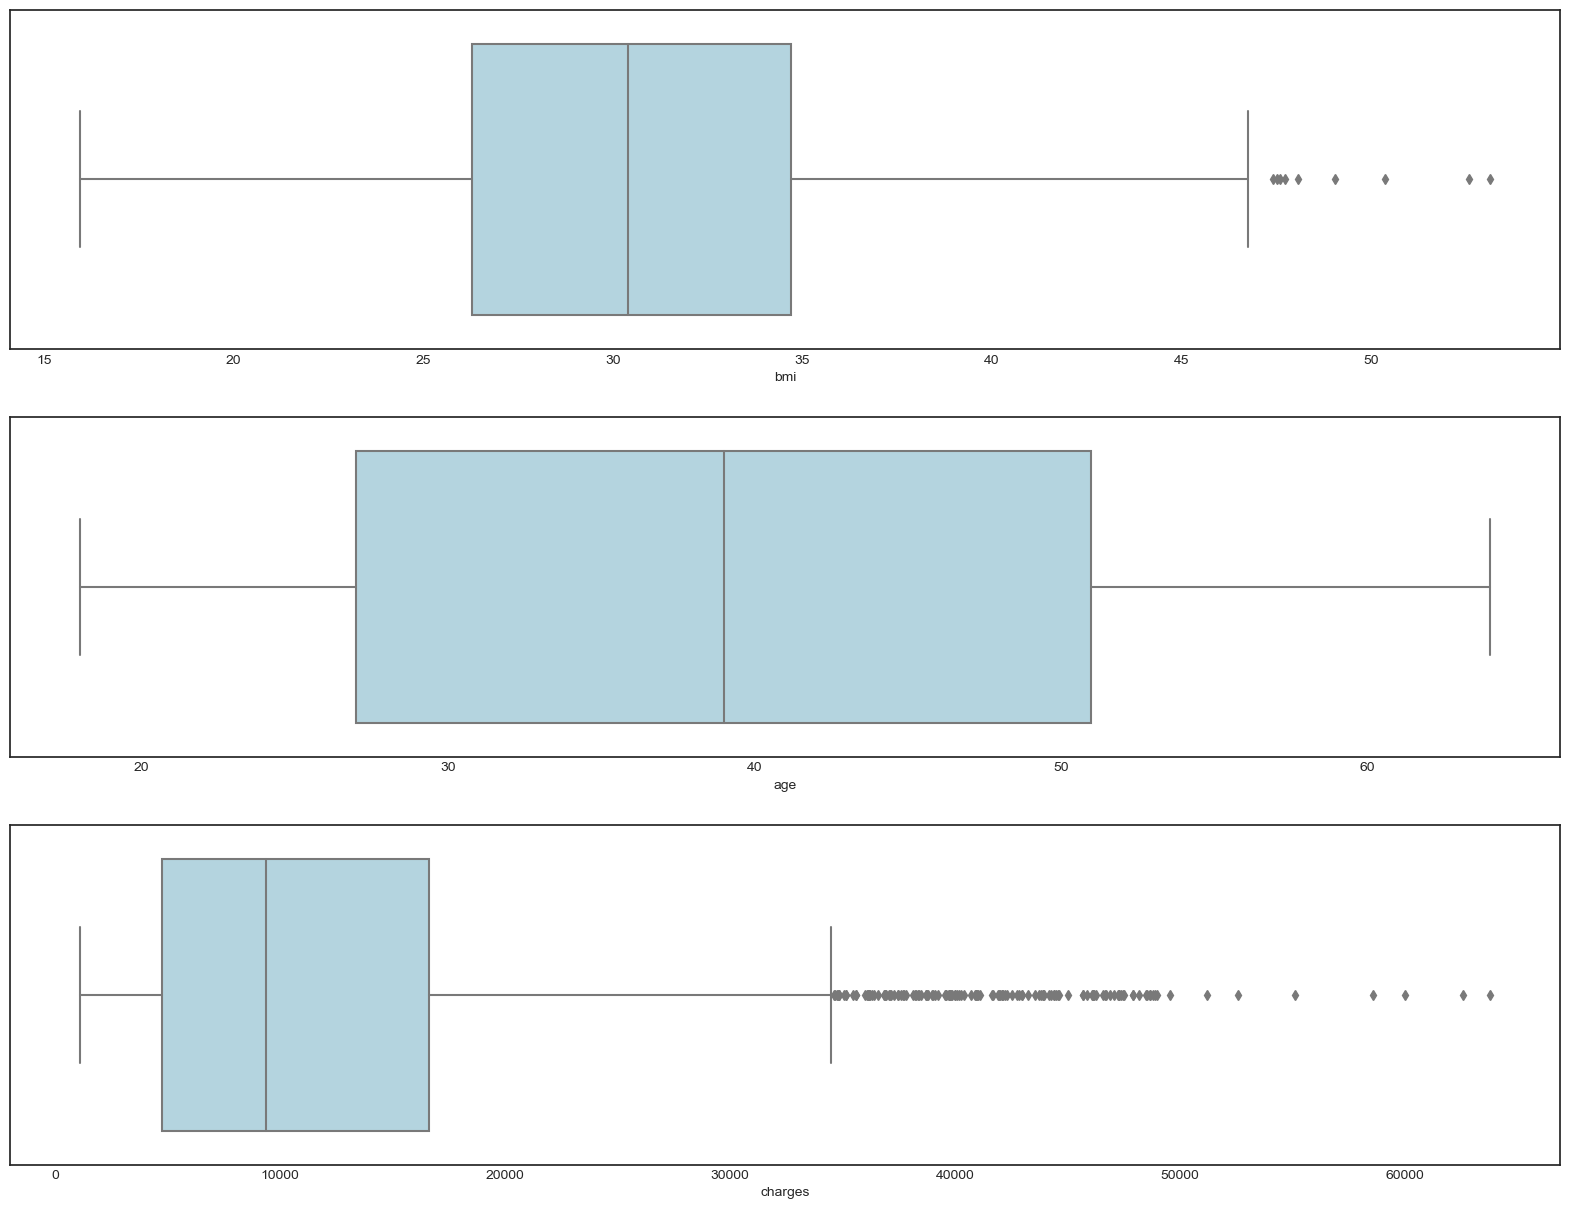

In [25]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df.charges, color='lightblue')

plt.show()

In [26]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Children Distribution')

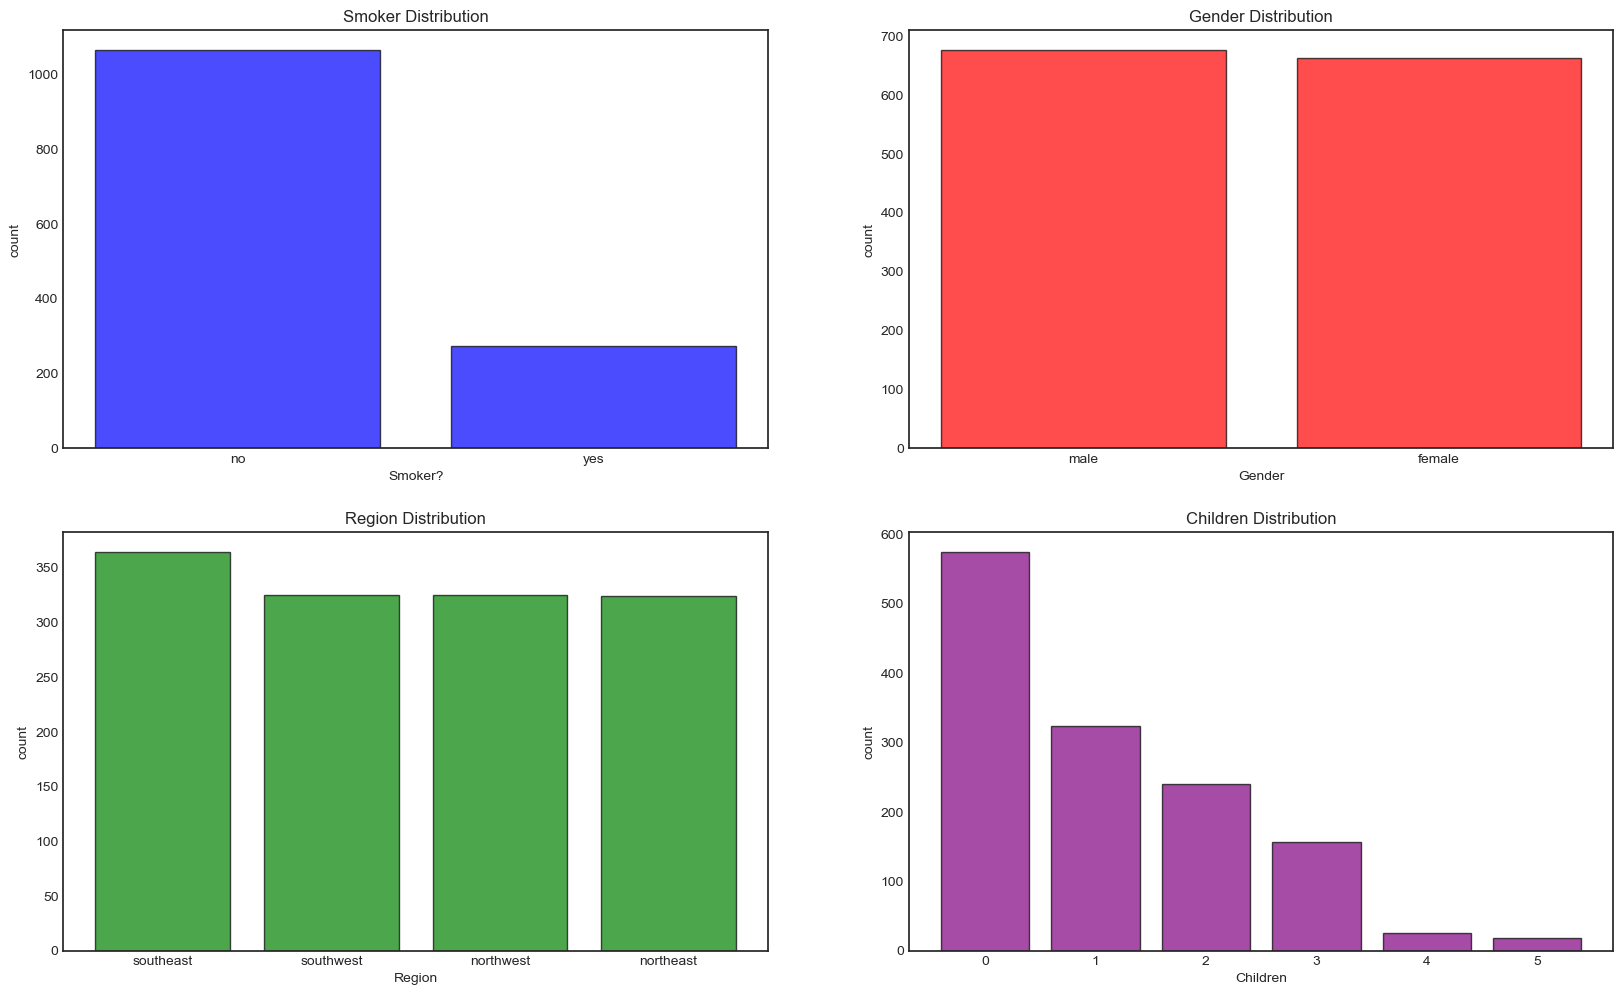

In [27]:
plt.figure(figsize=(20,25))
x = df.smoker.value_counts().index
y = [df['smoker'].value_counts()[i] for i in x]

plt.subplot(4,2,1)
plt.bar(x,y, align = 'center',color='blue',edgecolor='black',alpha=0.7)
plt.xlabel('Smoker?')
plt.ylabel('count')
plt.title('Smoker Distribution')

x1 = df.sex.value_counts().index
y1 = [df['sex'].value_counts()[j] for j in x1]

plt.subplot(4,2,2)
plt.bar(x1,y1, align = 'center', color= 'red',edgecolor='black',alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('count')
plt.title('Gender Distribution')

x2 = df.region.value_counts().index
y2 = [df['region'].value_counts()[k] for k in x2]

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color='green',edgecolor='black',alpha = 0.7)
plt.xlabel('Region')
plt.ylabel('count')
plt.title('Region Distribution')

x3 = df.children.value_counts().index
y3 = [df['children'].value_counts()[l]for l in x3]

plt.subplot(4,2,4)
plt.bar(x3,y3, align = 'center', color = 'purple',edgecolor='black',alpha = 0.7)
plt.xlabel('Children')
plt.ylabel('count')
plt.title('Children Distribution')

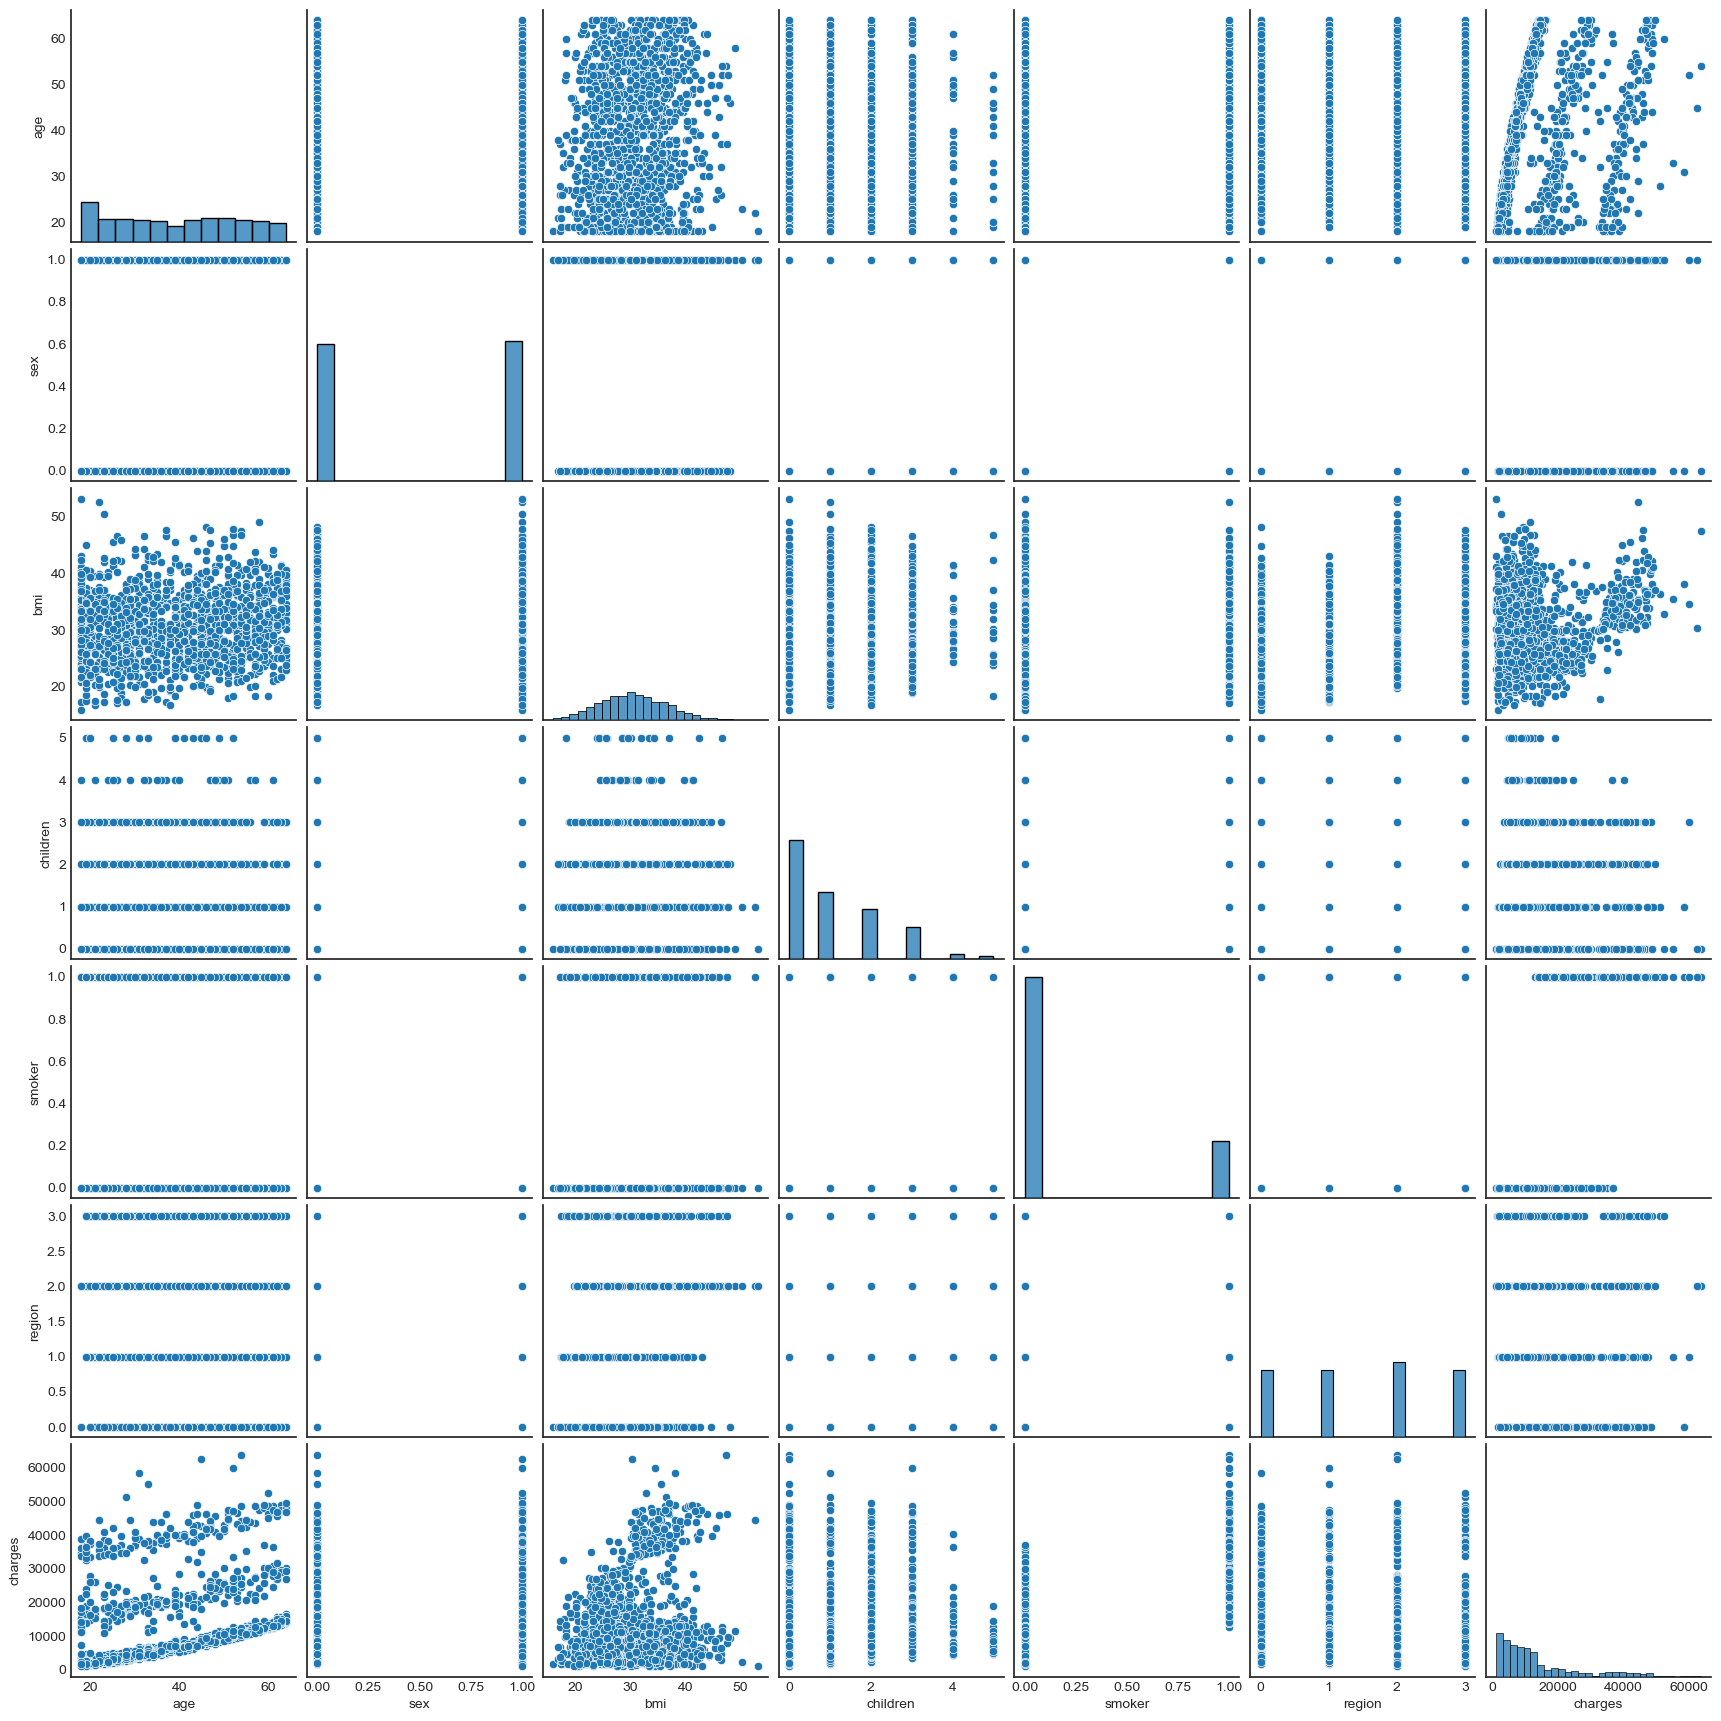

In [36]:
from sklearn.preprocessing import LabelEncoder
import copy
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex','smoker','region']] = df_encoded.loc[:,['sex','smoker','region']].apply(LabelEncoder().fit_transform)

sns.pairplot(df_encoded)
plt.show()

In [37]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [38]:
df_encoded

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [39]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\Users\Shahzaib Laptops\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


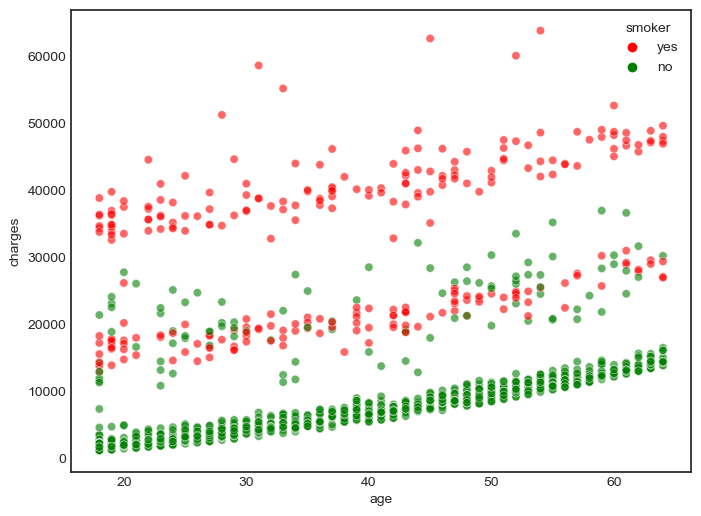

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age,df.charges,hue=df.smoker,palette=['red','green'],alpha=0.6)
plt.show()

In [41]:
Ho = "Charges of smoker and non-smoker are same " 
Ha = "Charges of smoker and non-smoker are not the same"

x = np.array(df[df.smoker == 'yes'].charges)
y = np.array(df[df.smoker == 'no'].charges)

t, p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842179102e-283) < 0.05


C:\Users\Shahzaib Laptops\AppData\Local\Temp\ipykernel_10164\2160781849.py:7: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t, p_value  = stats.ttest_ind(x,y, axis = 0)


In [42]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Shahzaib Laptops\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


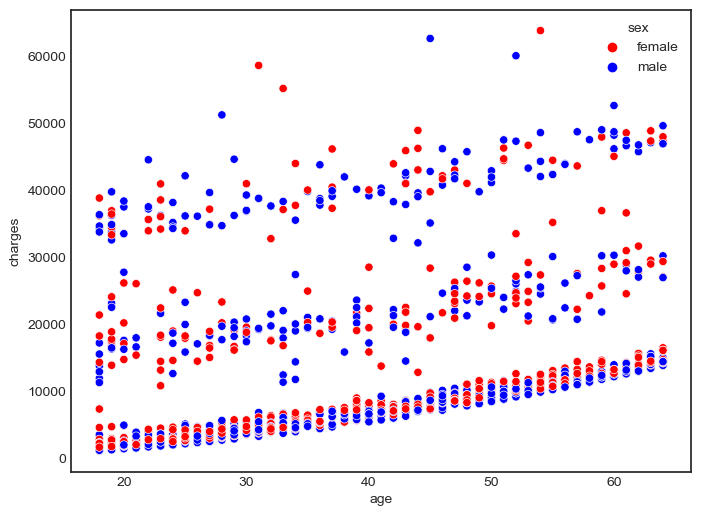

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.sex,palette= ['red','blue'] )
plt.show()

In [45]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(df[df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df[df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


C:\Users\Shahzaib Laptops\AppData\Local\Temp\ipykernel_10164\627438359.py:8: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test


In [50]:

# # Chi_square test to check if smoking habits are different for different genders
# Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
# Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

# crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

# chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

# if p_value < 0.05:  # Setting our significance level at 5%
#     print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
# else:
#     print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
# crosstab

In [49]:
# #@title
# # Chi_square test to check if smoking habits are different for people of different regions
# Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
# Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

# crosstab = pd.crosstab(df['smoker'], df['region'])  # Contingency table of sex and smoker attributes

# chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

# if p_value < 0.05:  # Setting our significance level at 5%
#     print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
# else:
#     print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
# crosstab

In [48]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05


C:\Users\Shahzaib Laptops\AppData\Local\Temp\ipykernel_10164\3657740939.py:14: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  f_stat, p_value = stats.f_oneway(zero,one,two)
